# *Flower Classification*

## *Import Libraries*
-------------------------------

In [33]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import matplotlib.pyplot as plt

## *Import Dataset*
-----------------------------------

In [ ]:
images_paths_dict = {}  # Empty dictionary to hold flower labels and their paths
for folder_name in ["daisy", "dandelion", "roses", "sunflowers", "tulips"]:
    root_path = "/content/drive/MyDrive/Deep Learning/FlowerClassification/flower_photos/{}/".format(folder_name)
    images = os.listdir(path = root_path)
    images_paths = []
    for image in images:
        images_paths.append(root_path + image)
    images_paths_dict[folder_name] = images_paths

In [ ]:
images_labels_dict = {
    "daisy" : 0,
    "dandelion" : 1,
    "roses" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}
images_labels_dict

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
# X_images = []
# y_labels = []

# for label, images_paths in images_paths_dict.items():
#     for image_path in images_paths:
#         img = cv2.imread(image_path)
#         X_images.append(img)
#         y_labels.append(images_labels_dict[label])

In [ ]:
# X_resized = []
# for image in X_images:
#     resized_image = cv2.resize(image, (180, 180))
#     X_resized.append(resized_image)

In [ ]:
# X_resized = np.array(X_resized)
# X_resized.shape

(3680, 180, 180, 3)

In [ ]:
# y_labels = np.array(y_labels)
# y_labels.shape

(3680,)

In [ ]:
# np.save("FlowerImages.npy", X_resized)
# np.save("FlowerLabels.npy", y_labels)

In [ ]:
# np.load(file = "/content/FlowerImages.npy").shape

(3680, 180, 180, 3)

In [ ]:
# y_labels = np.load(file = "/content/FlowerLabels.npy")
# y_labels.shape

In [ ]:
# X_resized_224x224 = []
# for image in X_images:
#     resized_image = cv2.resize(image, (224, 224))
#     X_resized_224x224.append(resized_image)

In [ ]:
# X_resized_224x224 = np.array(X_resized_224x224)
# X_resized_224x224.shape

(3680, 224, 224, 3)

In [ ]:
# np.save("FlowerImages_224x224.npy", X_resized_224x224)

In [7]:
X_resized = np.load(file = "/content/drive/MyDrive/Deep Learning/FlowerClassification/FlowerImages_224x224.npy")
X_resized.shape

(3680, 224, 224, 3)

In [8]:
y_labels = np.load(file = "/content/drive/MyDrive/Deep Learning/FlowerClassification/FlowerLabels.npy")
y_labels.shape

(3680,)

## *Split Data Into Train and Test Set*
---------------------------------------------

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, y_labels, random_state = 0)

In [10]:
X_train.shape, X_test.shape

((2760, 224, 224, 3), (920, 224, 224, 3))

In [11]:
y_train.shape, y_test.shape

((2760,), (920,))

## *Scaling Images*
---------------------------

In [12]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## *Building CNN Model*
--------------------------

### *Initialize The Model:*

In [13]:
model = Sequential([
    layers.Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units = 128, activation = "relu"),
    layers.Dense(5) # Because the are 5 classes of flowers
])

### *Complile The Model:*

In [14]:
model.compile(optimizer = "adam", 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

### *Train The Model:*

In [15]:
model.fit(X_train_scaled, y_train, epochs = 30, batch_size = 16)

Epoch 1/30
173/173 [==============================] - 35s 35ms/step - loss: 1.4117 - accuracy: 0.4391
Epoch 2/30
173/173 [==============================] - 6s 33ms/step - loss: 0.9916 - accuracy: 0.6188
Epoch 3/30
173/173 [==============================] - 6s 33ms/step - loss: 0.7124 - accuracy: 0.7388
Epoch 4/30
173/173 [==============================] - 6s 33ms/step - loss: 0.3812 - accuracy: 0.8627
Epoch 5/30
173/173 [==============================] - 6s 34ms/step - loss: 0.1948 - accuracy: 0.9388
Epoch 6/30
173/173 [==============================] - 6s 33ms/step - loss: 0.1153 - accuracy: 0.9638
Epoch 7/30
173/173 [==============================] - 6s 34ms/step - loss: 0.0386 - accuracy: 0.9920
Epoch 8/30
173/173 [==============================] - 6s 34ms/step - loss: 0.0393 - accuracy: 0.9909
Epoch 9/30
173/173 [==============================] - 6s 34ms/step - loss: 0.0222 - accuracy: 0.9949
Epoch 10/30
173/173 [==============================] - 6s 33ms/step - loss: 0.0216 - accur

### *Testing with X_test*

In [16]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 32ms/step - loss: 2.5252 - accuracy: 0.6457


[2.5251615047454834, 0.645652174949646]

* Training accuracy is 99.93% and Testing accuracy is 62.69%
* We see problem of overfitting

## *Build CNN Model with Data Augmentation*
----------------------------------------

### *Initialize Data Augmentation:*

In [18]:
data_augmentation = Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (224, 224, 3)),
      layers.experimental.preprocessing.RandomRotation(0.1),
      layers.experimental.preprocessing.RandomZoom(0.1)
])

### *Initialize CNN Model:*

In [19]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

### *Compile The Model:*

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### *Train The Model:*

In [21]:
model.fit(X_train_scaled, y_train, epochs=30, batch_size = 16)

Epoch 1/30
173/173 [==============================] - 8s 39ms/step - loss: 1.4215 - accuracy: 0.3946
Epoch 2/30
173/173 [==============================] - 7s 38ms/step - loss: 1.0645 - accuracy: 0.5786
Epoch 3/30
173/173 [==============================] - 7s 39ms/step - loss: 0.9332 - accuracy: 0.6438
Epoch 4/30
173/173 [==============================] - 7s 38ms/step - loss: 0.8556 - accuracy: 0.6667
Epoch 5/30
173/173 [==============================] - 7s 38ms/step - loss: 0.8111 - accuracy: 0.6906
Epoch 6/30
173/173 [==============================] - 7s 39ms/step - loss: 0.7472 - accuracy: 0.7130
Epoch 7/30
173/173 [==============================] - 7s 39ms/step - loss: 0.7404 - accuracy: 0.7159
Epoch 8/30
173/173 [==============================] - 7s 39ms/step - loss: 0.6694 - accuracy: 0.7428
Epoch 9/30
173/173 [==============================] - 7s 39ms/step - loss: 0.6609 - accuracy: 0.7551
Epoch 10/30
173/173 [==============================] - 7s 39ms/step - loss: 0.6180 - accura

### *Evaluate The Model:*

In [23]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 27ms/step - loss: 1.0323 - accuracy: 0.7163


[1.032281756401062, 0.716304361820221]

*Accuracy increased from 64% to 71% by using Data Augmentation.*

## *Build CNN Model Using Transfer Learning*

### *Initialize Pretrained Model:*

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_last_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

### *Initialize CNN Model:*

In [27]:
model = Sequential([
      pretrained_model_without_last_layer,
      layers.Dense(5)
])

### *Compile The Model:*

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### *Train The Model:*

In [29]:
model.fit(X_train_scaled, y_train, epochs=30, batch_size = 16)

Epoch 1/30
173/173 [==============================] - 12s 46ms/step - loss: 0.7692 - accuracy: 0.7083
Epoch 2/30
173/173 [==============================] - 8s 44ms/step - loss: 0.3721 - accuracy: 0.8703
Epoch 3/30
173/173 [==============================] - 8s 44ms/step - loss: 0.2854 - accuracy: 0.9087
Epoch 4/30
173/173 [==============================] - 8s 44ms/step - loss: 0.2329 - accuracy: 0.9283
Epoch 5/30
173/173 [==============================] - 8s 44ms/step - loss: 0.1908 - accuracy: 0.9486
Epoch 6/30
173/173 [==============================] - 8s 44ms/step - loss: 0.1688 - accuracy: 0.9536
Epoch 7/30
173/173 [==============================] - 8s 44ms/step - loss: 0.1415 - accuracy: 0.9656
Epoch 8/30
173/173 [==============================] - 8s 44ms/step - loss: 0.1242 - accuracy: 0.9728
Epoch 9/30
173/173 [==============================] - 8s 44ms/step - loss: 0.1079 - accuracy: 0.9804
Epoch 10/30
173/173 [==============================] - 8s 44ms/step - loss: 0.0957 - accur

### *Evaluate The Model:*

In [30]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 4s 96ms/step - loss: 0.4553 - accuracy: 0.8696


[0.4552895128726959, 0.8695651888847351]

## *Comparing Performances*

In [31]:
Models = ["CNN", "CNN with Data Augmentation", "CNN with Transfer Learning"]
accuracies = [62, 71, 86]

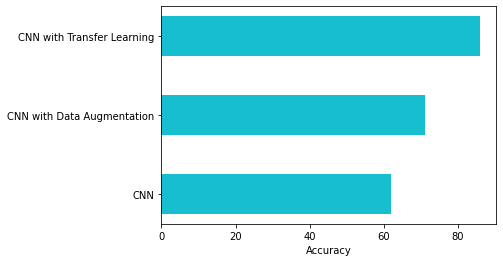

In [40]:
plt.barh(Models, accuracies, height = 0.5, color = "tab:cyan")
plt.xlabel("Accuracy")
plt.show()